In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

%matplotlib inline

# 厄尔尼诺/拉尼娜 (El Nino/La Nina) 现象

[https://www.ncdc.noaa.gov/teleconnections/enso/indicators/sst.php](https://www.ncdc.noaa.gov/teleconnections/enso/indicators/sst.php)

El Niño (La Niña) 现象指的是热带太平洋海面温度（Sea Surface Temperature, SST）随时间的震荡变化。El Niño 时，该平均海温比长期平均值高，而 La Niña 时，该平均海温较长期平均值低。通常以 0.5 °C 为阈值（即高出0.5 °C或低于-0.5 °C才认为发生 El Niño/La Niña 现象）。计算时通常取3个月的滚动平均值，并需要连续5个月满足条件，才会认定该年份为 El Niño 或 La Niña 年，否则为中性年。该温度差值被称为 Oceanic Niño Index (ONI)。 

El Niño (La Niña) is a phenomenon in the equatorial Pacific Ocean characterized by a five consecutive 3-month running mean of sea surface temperature (SST) anomalies in the Niño 3.4 region that is above (below) the threshold of +0.5°C (-0.5°C). This standard of measure is known as the Oceanic Niño Index (ONI).

![](https://www.ncdc.noaa.gov/monitoring-content/teleconnections/nino-regions.gif)

如上图所示，ONI 可以在多个区域进行计算。常用的为 Nino3.4（对应图中标示为3.4的区域），即 5°N - 5°S，120 - 170°W。Nino3.4 结果如下图：

![](https://www.ncdc.noaa.gov/monitoring-content/teleconnections/eln-f-pg.gif)

## 数据

我们使用 NOAA 的 Extended Reconstructed Sea Surface Temperature (ERSST) V5
（https://www.esrl.noaa.gov/psd/data/gridded/data.noaa.ersst.v5.html）
月平均温度数据来计算 Nino3.4 指数，并绘出上面的图。

In [2]:
sst = xr.open_dataarray('sst.mnmean.1950-2019.nc')

In [3]:
sst

<xarray.DataArray 'sst' (time: 840, lat: 89, lon: 180)>
[13456800 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2019-12-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

<span style='color:red'>注意经度是 0 - 360 度，纬度是 88 - -88 度 (逆序） </span>

/Users/lixx/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


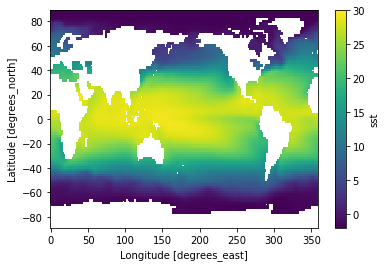

In [4]:
sst.mean(dim='time').plot(vmin=-2, vmax=30)

### <span style='color:red'> 作业1 </span>

请将上图进行美化：
- 将经度改为 -180 - 180 度
- 增加投影信息（PlateCarree）
- 加上海岸线
- 在坐标轴标签改成格式化的经纬度 （如 90°E，20°N等）
- 将坐标轴的标题（‘Longitude','Latitude‘）去掉

In [5]:
# 你的代码

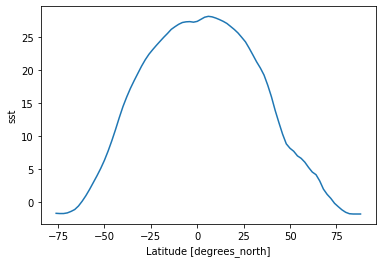

In [6]:
sst_zonal_time_mean = sst.mean(dim=('time', 'lon'))
sst_zonal_time_mean.plot()

我们可以来看看海温异常（anomaly）随时间和纬度的变化

/Users/lixx/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


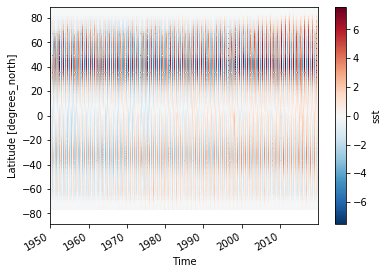

In [7]:
(sst.mean(dim='lon') - sst_zonal_time_mean).T.plot()

不同纬度处的海温变化幅度是不同的

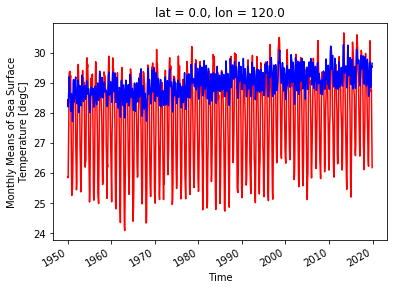

In [8]:
sst.sel(lon=120, lat=17, method='nearest').plot(color='r')
sst.sel(lon=120, lat=0, method='nearest').plot(color='b')

## SST 异常（anomaly）

/Users/lixx/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


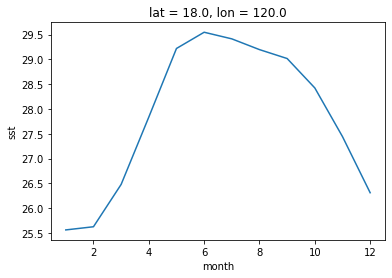

In [9]:
# 气候（即长期平均值）
sst_clim = sst.groupby('time.month').mean(dim='time')
sst_clim.sel(lon=120, lat=17, method='nearest').plot()

/Users/lixx/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


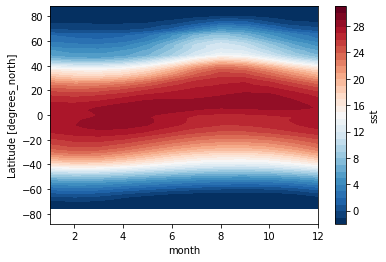

In [10]:
# Hovmoller 图
sst_clim.mean(dim='lon').T.plot.contourf(levels=np.arange(-2,32))

我们可以计算海温的异常值（即瞬时值 - 气候）

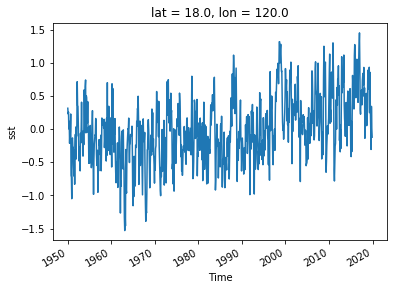

In [11]:
sst_anom = sst.groupby('time.month') - sst_clim
sst_anom.sel(lon=120, lat=17, method='nearest').plot()

/Users/lixx/miniconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


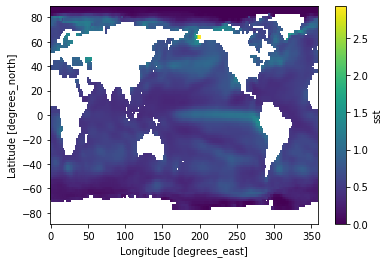

In [12]:
sst_anom.std(dim='time').plot()

### <span style='color:red'>作业2</span>

绘制 NOAA 的 Nino3.4 曲线图 （本文件从上往下数第2张图）
- 计算Nino3.4区域内的海温异常的空间平均值（即对经度和纬度求平均）
- 对该平均值再求3个月滚动平均，命名为 oni
- 绘制3个月滚动平均随时间的变化
- 对正、负值进行填色
- 画出 0.5，0， -0.5 °C 三条横线，其中 0 为实线，其它两条为虚线 `ax.axhline()`
- 修改坐标轴的标题

In [ ]:
# 你的代码

## 对厄尔尼诺/拉尼娜进行聚合分析 Composite analysis

聚合分析是指对性质相似的事件进行归类、取平均，以便归纳同类型事件的特性。此处我们来看厄尔尼诺和拉尼娜现象对应的海温异常分布。

In [ ]:
# 创建一个新的 dataarray，其形状和 sst 一样，但是数据类型是分类（category）
# oni 是你在作业2中创建的Nino3.4指数

nino34 = xr.full_like(oni, 'none', dtype='U4')
nino34[oni >= 0.5] = 'nino'
nino34[oni <= -0.5] = 'nina'
nino34

### <span style='color:red'>作业3</span>

- 根据上面的 `nino3.4`，对 `sst_anom` 进行分类，并求平均
- 分别画出厄尔尼诺和拉尼娜时的 `sst_anom` 空间分布图。注意：要按照作业1的美观要求进行绘制。

In [ ]:
# 你的代码